<a href="https://colab.research.google.com/github/AshKanishk/ChemicalBinClassifier/blob/master/ChemicalDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing important libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


Uploading the dataset


In [3]:
uploaded = files.upload()

Saving musk_csv.csv to musk_csv.csv


Accessing the Dataset and finding the best feature for training

In [4]:
!head {'musk_csv.csv'}

ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,-44,98,-33,-314,-282,-335,-144,-13,-197,-2,-144,-13,-11,

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


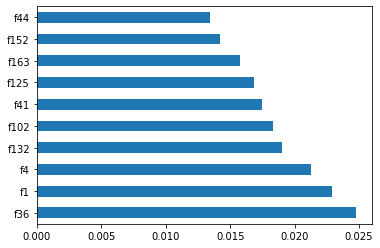

In [6]:
data = pd.read_csv('musk_csv.csv')

X = data.iloc[:,3:169]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Normalizing the data and dividing the dataset into 80% training and 20% test dataset

In [0]:
cols = ["f1","f4","f36","f132", "f102","f125", "f41", "f163", "f152", "f44"]
data[cols] = data[cols].apply(lambda x: (x-x.min())/(x.max()-x.min()))
#from scipy.stats import zscore
#data[cols] = data[cols].apply(zscore)

In [0]:
X = data.drop('class', axis=1)
labels = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, labels,test_size=0.2)

Building and Training Model

In [0]:
feat1 = tf.feature_column.numeric_column("f1")
feat2 = tf.feature_column.numeric_column("f4")
feat3 = tf.feature_column.numeric_column("f36")
feat4 = tf.feature_column.numeric_column("f132")
feat5 = tf.feature_column.numeric_column("f102")
feat6 = tf.feature_column.numeric_column("f125")
feat7 = tf.feature_column.numeric_column("f41")
feat8 = tf.feature_column.numeric_column("f163")
feat9 = tf.feature_column.numeric_column("f152")
feat10 = tf.feature_column.numeric_column("f44")
feat_columns = [feat1, feat2, feat3, feat4, feat5, feat6, feat7, feat8, feat9, feat10]

In [0]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)
model = tf.estimator.LinearClassifier(feature_columns=feat_columns, n_classes=2)

In [20]:
history = model.train(input_fn= input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxpml3zjf/model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpxpml3zjf/model.ckpt.
INFO:tensorflow:loss = 0.19006665, step = 1000
I

In [23]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)
predictions = list(model.predict(input_fn=pred_input_func))
final_preds = []
for pred in predictions : 
  final_preds.append(pred['class_ids'][0])
from sklearn.metrics import classification_report
print(classification_report(y_test,final_preds))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxpml3zjf/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1129
           1       0.85      0.06      0.11       191

    accuracy                           0.86      1320
   macro avg       0.8